In [123]:
from astropy.io import fits
from astropy.table import Table, vstack, hstack
import matplotlib.pyplot as plt
import numpy as np

# Data

In [112]:
file_name = 'bundle_20230529_standards/combined_spectrum_20230112_0000009_exp01.fits'
hdul = fits.open(file_name)
data = hdul[0].data
hdr = hdul[0].header


<Figure size 1000x600 with 0 Axes>

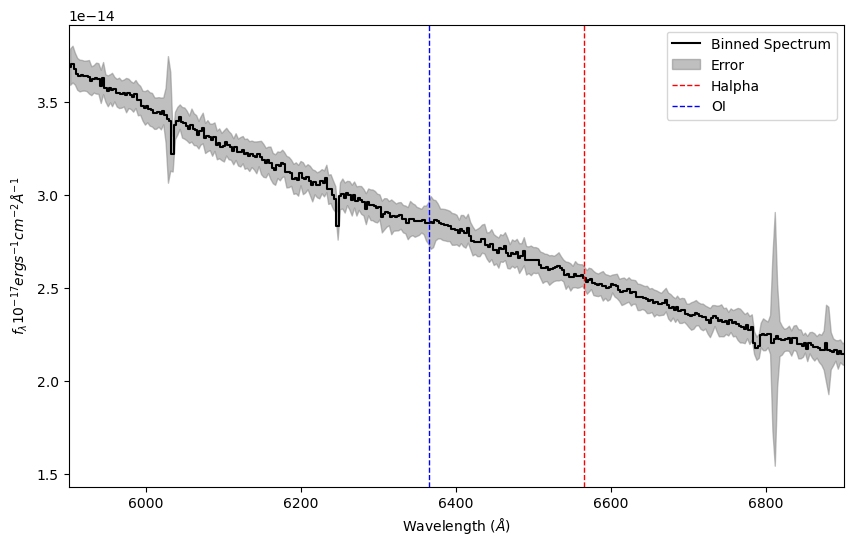

In [122]:
plt.figure(figsize=(10, 6))
wl = data[0]
flux = data[1]
err = data[2]



z = 0.081
wl = wl*(1+z)

wl_lim = np.where((wl>5900)&(wl<6950))
wl=wl[wl_lim]
flux=flux[wl_lim]
err=err[wl_lim]





bin_width = 3

bins = np.arange(min(wl), max(wl) + bin_width, bin_width)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

indices = np.digitize(wl, bins)

binned_wl = []
binned_flux = []
binned_flux_err = []


for i in range(1, len(bins)):
    in_bin = indices == i
    if np.any(in_bin):
        binned_wl.append(np.mean(wl[in_bin]))
        binned_flux.append(np.mean(flux[in_bin]))
        binned_flux_err.append(np.mean(err[in_bin]))
    else:
        pass

binned_wl = np.array(binned_wl)
binned_flux = np.array(binned_flux)
binned_flux_err = np.array(binned_flux_err)

plt.figure(figsize=(10, 6))
plt.plot(binned_wl, binned_flux, label='Binned Spectrum', color="black", drawstyle='steps-mid')
plt.fill_between(binned_wl, binned_flux - binned_flux_err, binned_flux + binned_flux_err, color='gray', alpha=0.5, label='Error')
plt.axvline(x=6564.93, color='r', linestyle='--', linewidth=1, label="Halpha")
plt.axvline(x=6365, color='b', linestyle='--', linewidth=1, label="OI")
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("$f_{\lambda} 10^{-17} erg s^{-1} cm^{-2} \AA^{-1}$")
plt.xlim(5900, 6900)
#plt.ylim(0, 100)
plt.legend()
plt.show()

# Functions